In [26]:
from pathlib import Path
from pandas import DataFrame
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sbn

sbn.set()
sbn.set_palette("bright")
base_path = Path(".").absolute().parent
savefig: bool = False
auto_tests: bool = True

BOTH = "/Users/fabianscharnbock/PycharmProjects/FlakyRootDir/flakyexperiments/src/results/flapy-results-no-tests-to-be-run/flapy-results_20220612_200531/!results_csvs/test_overview.csv"
NORMAL = "/Users/fabianscharnbock/PycharmProjects/FlakyRootDir/flakyexperiments/src/results/flapy-results_20220606_143702/!results_csvs/passed_failed.csv"

df_BOTH = pd.read_csv(BOTH)
df_NORMAL = pd.read_csv(NORMAL)

df_BOTH = df_BOTH[df_BOTH['Test_classname'].notna()]
df_NORMAL = df_NORMAL[df_NORMAL['Test_classname'].notna()]

# Drop if existing tests that have not been created by pynguin or un-deliberately executed by flaky
if auto_tests:
    df_BOTH = df_BOTH[df_BOTH['Test_classname'].str.contains('pynguin_auto_tests_')].reset_index(drop=True)
    df_NORMAL = df_NORMAL[df_NORMAL['Test_classname'].str.contains('pynguin_auto_tests_')].reset_index(drop=True)

df_NORMAL

,Project_Name,Project_URL,Project_Hash,Test_filename,Test_classname,Test_funcname,Test_parametrization,flaky?,Verdicts_sameOrder,Passed_sameOrder,...,Skipped_randomOrder,#Runs_randomOrder,Flaky_sameOrder_withinIteration,Flaky_randomOrder_withinIteration,Verdict_sameOrder,Verdict_randomOrder,Order-dependent,Flaky_Infrastructure,Test_nodeid,Test_nodeid_inclPara
0,BT-Tracker,/scratch/scharnboec/FlakyRoot/projects/BT-Tracker,NaN,NaN,pynguin_auto_tests_1653025019936_4310024.test_...,test_case_0,NaN,not flaky,{'Passed'},200,...,0,200.0,False,False,Passed,Passed,False,False,pynguin_auto_tests_1653025019936_4310024/test_...,pynguin_auto_tests_1653025019936_4310024/test_...
1,BT-Tracker,/scratch/scharnboec/FlakyRoot/projects/BT-Tracker,NaN,NaN,pynguin_auto_tests_1653025019936_4310024.test_...,test_case_0,NaN,not flaky,{'Skipped'},0,...,200,200.0,False,False,Skipped,Skipped,False,False,pynguin_auto_tests_1653025019936_4310024/test_...,pynguin_auto_tests_1653025019936_4310024/test_...
2,BT-Tracker,/scratch/scharnboec/FlakyRoot/projects/BT-Tracker,NaN,NaN,pynguin_auto_tests_1653025019936_4310024.test_...,test_case_1,NaN,not flaky,{'Passed'},200,...,0,200.0,False,False,Passed,Passed,False,False,pynguin_auto_tests_1653025019936_4310024/test_...,pynguin_auto_tests_1653025019936_4310024/test_...
3,BT-Tracker,/scratch/scharnboec/FlakyRoot/projects/BT-Tracker,NaN,NaN,pynguin_auto_tests_1653025019936_4310024.test_...,test_case_10,NaN,not flaky,{'Passed'},200,...,0,200.0,False,False,Passed,Passed,False,False,pynguin_auto_tests_1653025019936_4310024/test_...,pynguin_auto_tests_1653025019936_4310024/test_...
4,BT-Tracker,/scratch/scharnboec/FlakyRoot/projects/BT-Tracker,NaN,NaN,pynguin_auto_tests_1653025019936_4310024.test_...,test_case_11,NaN,not flaky,{'Skipped'},0,...,200,200.0,False,False,Skipped,Skipped,False,False,pynguin_auto_tests_1653025019936_4310024/test_...,pynguin_auto_tests_1653025019936_4310024/test_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9083,yunomi,/scratch/scharnboec/FlakyRoot/projects/yunomi,NaN,NaN,pynguin_auto_tests_1653025019608_5293791.test_...,test_case_1,NaN,not flaky,{'Passed'},200,...,0,200.0,False,False,Passed,Passed,False,False,pynguin_auto_tests_1653025019608_5293791/test_...,pynguin_auto_tests_1653025019608_5293791/test_...
9084,yunomi,/scratch/scharnboec/FlakyRoot/projects/yunomi,NaN,NaN,pynguin_auto_tests_1653025019608_5293791.test_...,test_case_2,NaN,not flaky,{'Passed'},200,...,0,200.0,False,False,Passed,Passed,False,False,pynguin_auto_tests_1653025019608_5293791/test_...,pynguin_auto_tests_1653025019608_5293791/test_...
9085,yunomi,/scratch/scharnboec/FlakyRoot/projects/yunomi,NaN,NaN,pynguin_auto_tests_1653025019608_5293791.test_...,test_case_3,NaN,not flaky,{'Skipped'},0,...,200,200.0,False,False,Skipped,Skipped,False,False,pynguin_auto_tests_1653025019608_5293791/test_...,pynguin_auto_tests_1653025019608_5293791/test_...
9086,yunomi,/scratch/scharnboec/FlakyRoot/projects/yunomi,NaN,NaN,pynguin_auto_tests_1653025019608_5293791.test_...,test_case_4,NaN,not flaky,{'Passed'},200,...,0,200.0,False,False,Passed,Passed,False,False,pynguin_auto_tests_1653025019608_5293791/test_...,pynguin_auto_tests_1653025019608_5293791/test_...


In [27]:
df_NORMAL = df_NORMAL.rename(columns={'flaky?': 'flaky'})
df_NORMAL_flaky = df_NORMAL[df_NORMAL['flaky'] != 'not flaky']
df_BOTH = df_BOTH.rename(columns={'flaky?': 'flaky'})
df_BOTH_flaky = df_BOTH[df_BOTH['flaky'] != 'not flaky']
merged = pd.merge(df_BOTH_flaky, df_NORMAL, how='outer', indicator=True, on=['Project_Name', 'Project_URL', 'Test_classname', 'Test_funcname'])

In [28]:
left = merged[merged['_merge'] == 'left_only']
left_len = len(left.index)
right = merged[merged['_merge'] == 'right_only']
right_len=len(right.index)
both = merged[merged['_merge'] == 'both']
both_len=len(both.index)

merged

,Project_Name,Project_URL,Project_Hash_x,Test_filename_x,Test_classname,Test_funcname,Test_parametrization_x,flaky_x,Verdicts_sameOrder_x,Passed_sameOrder_x,...,#Runs_randomOrder_y,Flaky_sameOrder_withinIteration_y,Flaky_randomOrder_withinIteration_y,Verdict_sameOrder_y,Verdict_randomOrder_y,Order-dependent_y,Flaky_Infrastructure_y,Test_nodeid_y,Test_nodeid_inclPara_y,_merge
0,BT-Tracker,/scratch/scharnboec/FlakyRoot/projects/BT-Tracker,NaN,NaN,pynguin_auto_tests_1653025019936_4310024.test_...,test_case_0,NaN,order-dependent,{'Passed'},200.0,...,200.0,False,True,Passed,Flaky,True,False,pynguin_auto_tests_1653025019936_4310024/test_...,pynguin_auto_tests_1653025019936_4310024/test_...,both
1,EasyJWT,/scratch/scharnboec/FlakyRoot/projects/EasyJWT,NaN,NaN,pynguin_auto_tests_1653025019672_3713194.test_...,test_case_0,NaN,order-dependent,{'Passed'},200.0,...,200.0,False,False,Passed,Passed,False,False,pynguin_auto_tests_1653025019672_3713194/test_...,pynguin_auto_tests_1653025019672_3713194/test_...,both
2,Penman,/scratch/scharnboec/FlakyRoot/projects/Penman,NaN,NaN,pynguin_auto_tests_1653025019947_6531505.test_...,test_case_6,NaN,non-order-dependent,"{'Passed', 'Failed'}",33.0,...,200.0,True,True,Flaky,Flaky,False,False,pynguin_auto_tests_1653025019947_6531505/test_...,pynguin_auto_tests_1653025019947_6531505/test_...,both
3,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_2,NaN,order-dependent,{'Passed'},200.0,...,200.0,False,True,Passed,Flaky,True,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,both
4,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_4,NaN,order-dependent,{'Passed'},200.0,...,200.0,False,True,Passed,Flaky,True,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9083,yunomi,/scratch/scharnboec/FlakyRoot/projects/yunomi,NaN,NaN,pynguin_auto_tests_1653025019608_5293791.test_...,test_case_1,NaN,NaN,NaN,NaN,...,200.0,False,False,Passed,Passed,False,False,pynguin_auto_tests_1653025019608_5293791/test_...,pynguin_auto_tests_1653025019608_5293791/test_...,right_only
9084,yunomi,/scratch/scharnboec/FlakyRoot/projects/yunomi,NaN,NaN,pynguin_auto_tests_1653025019608_5293791.test_...,test_case_2,NaN,NaN,NaN,NaN,...,200.0,False,False,Passed,Passed,False,False,pynguin_auto_tests_1653025019608_5293791/test_...,pynguin_auto_tests_1653025019608_5293791/test_...,right_only
9085,yunomi,/scratch/scharnboec/FlakyRoot/projects/yunomi,NaN,NaN,pynguin_auto_tests_1653025019608_5293791.test_...,test_case_3,NaN,NaN,NaN,NaN,...,200.0,False,False,Skipped,Skipped,False,False,pynguin_auto_tests_1653025019608_5293791/test_...,pynguin_auto_tests_1653025019608_5293791/test_...,right_only
9086,yunomi,/scratch/scharnboec/FlakyRoot/projects/yunomi,NaN,NaN,pynguin_auto_tests_1653025019608_5293791.test_...,test_case_4,NaN,NaN,NaN,NaN,...,200.0,False,False,Passed,Passed,False,False,pynguin_auto_tests_1653025019608_5293791/test_...,pynguin_auto_tests_1653025019608_5293791/test_...,right_only


### In order to make assumptions about the flaky tests in the BOTH run compared to the tests from the NORMAL run, we DO NOT WANT any flaky test to only show up in the BOTH run. We want a flaky test from BOTH run to also show up (flaky or not) in the NORMAL run

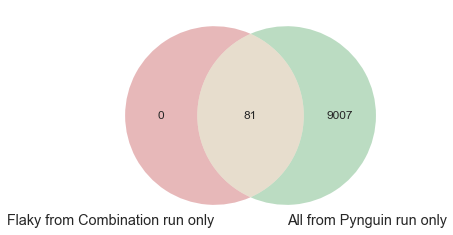

In [29]:
from matplotlib_venn import venn2_unweighted, venn2_circles, venn2
venn2_unweighted([left_len, right_len, both_len], ['Flaky from Combination run only', 'All from Pynguin run only'])

### This shows: There is no flaky test that has solely been executed and found in the BOTH run, which means comparing the flaky tests in the Human+Pynguin (df_BOTH_flaky) run with the Pynguin only (df_NORMAL) run is valid and will not disturb the results.

13


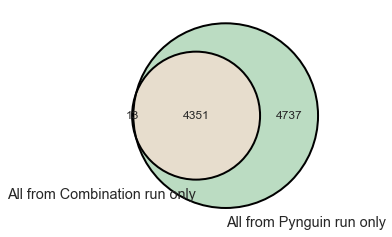

In [30]:
merged = pd.merge(df_BOTH, df_NORMAL, indicator=True, how='outer', on=['Project_Name', 'Project_URL', 'Test_classname', 'Test_funcname'])
left = merged[merged['_merge'] == 'left_only']
left_len = len(left.index)
right = merged[merged['_merge'] == 'right_only']
right_len=len(right.index)
both = merged[merged['_merge'] == 'both']
both_len=len(both.index)

venn2([left_len, right_len, both_len], ['All from Combination run only', 'All from Pynguin run only'])
venn2_circles([left_len, right_len, both_len])

print(left_len)

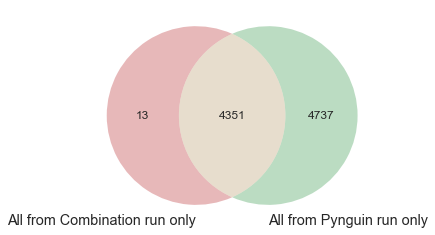

In [31]:
venn2_unweighted([left_len, right_len, both_len], ['All from Combination run only', 'All from Pynguin run only'])

In [32]:
df_BOTH['Project_URL'].unique()

array(['/scratch/scharnboec/FlakyRoot/projects/BT-Tracker',
       '/scratch/scharnboec/FlakyRoot/projects/EasyJWT',
       '/scratch/scharnboec/FlakyRoot/projects/Flask-InterfacePubSub',
       '/scratch/scharnboec/FlakyRoot/projects/Flask-Multi-Redis',
       '/scratch/scharnboec/FlakyRoot/projects/Flaskerizer',
       '/scratch/scharnboec/FlakyRoot/projects/GetOldTweets3',
       '/scratch/scharnboec/FlakyRoot/projects/HikLoad',
       '/scratch/scharnboec/FlakyRoot/projects/Intervallum',
       '/scratch/scharnboec/FlakyRoot/projects/JavPy',
       '/scratch/scharnboec/FlakyRoot/projects/MusicAPI',
       '/scratch/scharnboec/FlakyRoot/projects/OccamTools',
       '/scratch/scharnboec/FlakyRoot/projects/OnToma',
       '/scratch/scharnboec/FlakyRoot/projects/Penman',
       '/scratch/scharnboec/FlakyRoot/projects/PyGraph',
       '/scratch/scharnboec/FlakyRoot/projects/PySyncDroid',
       '/scratch/scharnboec/FlakyRoot/projects/QTAF',
       '/scratch/scharnboec/FlakyRoot/projects